# Anime Video Generator (Colab)

Run the cells in order. Make sure `Runtime -> Change runtime type -> GPU` is selected before running.

This notebook installs a tested combo of packages and generates a short anime-style video using Stable Diffusion (img2img chaining).

In [1]:
# Cell 1 — Install compatible packages (run once on a fresh runtime)
!pip install -q --no-cache-dir --upgrade --force-reinstall \
  "huggingface_hub==0.13.4" \
  "diffusers==0.20.2" \
  "transformers==4.29.2" \
  "accelerate==0.18.0" \
  "safetensors==0.3.1"

!pip install -q --no-cache-dir --upgrade --force-reinstall torch torchvision --index-url https://download.pytorch.org/whl/cu118
!pip install -q --no-cache-dir --upgrade --force-reinstall pillow tqdm
!apt-get update -y && apt-get install -y ffmpeg

print('Install complete. Now: Runtime -> Restart runtime (manual). If runtime restarts automatically, continue to next cell.')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 26.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 163.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 164.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 157.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 122.5 MB/s eta 0:00:00
ERROR: Cannot install diffusers==0.20.2, huggingface_hub==0.13.4 and transformers==4.29.2 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# Cell 2 — After restart: device check
import torch
print('Device:', 'cuda' if torch.cuda.is_available() else 'cpu')

Device: cuda


In [1]:
# Cell 3 — Config (edit prompt/params if you want)
PROMPT = "Anime style girl pressing a glowing button on rooftop, purple energy explosion, cinematic"
MODEL = "runwayml/stable-diffusion-v1-5"
WIDTH = 512
HEIGHT = 512
FRAMES = 20
STEPS = 20
GUIDANCE = 7.5
STRENGTH = 0.6
SEED = 42
OUT_DIR = "/content/frames"
VIDEO_OUT = "/content/out.mp4"
print('Config set. Change PROMPT or FRAMES here if you want.')

Config set. Change PROMPT or FRAMES here if you want.


In [2]:
print("OUT_DIR =", OUT_DIR)

OUT_DIR = /content/frames


In [7]:
# Replace your Cell 4 with this exact code (no extra leading spaces/tabs)
import os
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

# Ensure config exists, otherwise set defaults
if 'OUT_DIR' not in globals():
    OUT_DIR = "/content/frames"
if 'MODEL' not in globals():
    MODEL = "runwayml/stable-diffusion-v1-5"

os.makedirs(OUT_DIR, exist_ok=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load txt2img pipeline
txt_pipe = StableDiffusionPipeline.from_pretrained(
    MODEL,
    torch_dtype=(torch.float16 if device == 'cuda' else torch.float32)
).to(device)
txt_pipe.safety_checker = None

# load img2img pipeline
img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    MODEL,
    torch_dtype=(torch.float16 if device == 'cuda' else torch.float32)
).to(device)
img_pipe.safety_checker = None

print("Pipelines loaded! Device:", device, "| OUT_DIR:", OUT_DIR)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Pipelines loaded! Device: cuda | OUT_DIR: /content/frames


  0%|          | 0/20 [00:00<?, ?it/s]

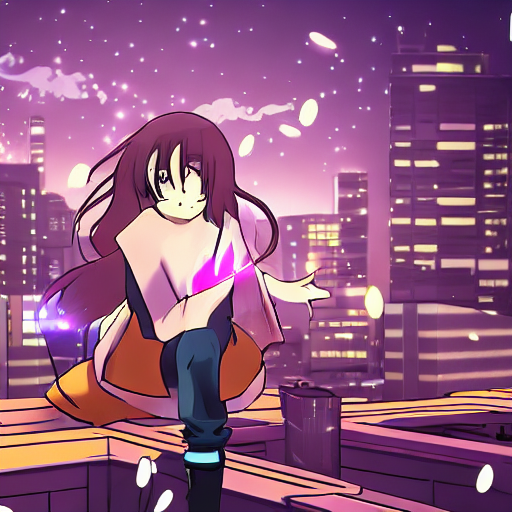

Saved base frame to /content/frames/frame_0000.png


In [8]:
# Cell 5 — Generate base frame (txt2img)
from PIL import Image
import torch
generator = torch.Generator(device=device).manual_seed(SEED)
result = txt_pipe(PROMPT, height=HEIGHT, width=WIDTH, num_inference_steps=STEPS, guidance_scale=GUIDANCE, generator=generator)
base_img = result.images[0].convert('RGB')
base_img.save(f"{OUT_DIR}/frame_0000.png")
display(base_img)
print('Saved base frame to', f"{OUT_DIR}/frame_0000.png")

In [10]:
# Replace your Cell 6 with this safe version
from PIL import Image
import numpy as np
from tqdm import tqdm

# start from base_img (should exist from Cell 5)
current = base_img

# ensure current is a PIL Image
if not isinstance(current, Image.Image):
    current = Image.fromarray(np.array(current)).convert("RGB")

for i in tqdm(range(1, FRAMES)):
    this_seed = SEED + i * 13
    generator = torch.Generator(device=device).manual_seed(this_seed)

    # small variation for motion
    strength = STRENGTH * (0.9 + 0.2 * (i / FRAMES))

    # ensure current is PIL image (again)
    if not isinstance(current, Image.Image):
        current = Image.fromarray(np.array(current)).convert("RGB")

    # Try the modern param name 'image=' first; if that errors, fallback to 'init_image='
    try:
        out = img_pipe(
            prompt=PROMPT,
            image=current,
            strength=strength,
            guidance_scale=GUIDANCE,
            num_inference_steps=STEPS,
            generator=generator
        )
    except TypeError:
        # fallback for older/newer diffusers that expect 'init_image' name
        out = img_pipe(
            prompt=PROMPT,
            init_image=current,
            strength=strength,
            guidance_scale=GUIDANCE,
            num_inference_steps=STEPS,
            generator=generator
        )

    frame = out.images[0].convert("RGB")
    frame.save(f"{OUT_DIR}/frame_{i:04d}.png")
    current = frame

print("Frames saved to", OUT_DIR)


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  5%|▌         | 1/19 [00:02<00:37,  2.07s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

 11%|█         | 2/19 [00:04<00:35,  2.09s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

 16%|█▌        | 3/19 [00:06<00:33,  2.08s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

 21%|██        | 4/19 [00:08<00:31,  2.08s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

 26%|██▋       | 5/19 [00:10<00:29,  2.09s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

 32%|███▏      | 6/19 [00:12<00:27,  2.08s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

 37%|███▋      | 7/19 [00:14<00:24,  2.08s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

 42%|████▏     | 8/19 [00:16<00:22,  2.08s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

 47%|████▋     | 9/19 [00:18<00:20,  2.08s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 53%|█████▎    | 10/19 [00:20<00:19,  2.13s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 58%|█████▊    | 11/19 [00:23<00:17,  2.16s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 63%|██████▎   | 12/19 [00:25<00:15,  2.19s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 68%|██████▊   | 13/19 [00:27<00:13,  2.22s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 74%|███████▎  | 14/19 [00:29<00:11,  2.23s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 79%|███████▉  | 15/19 [00:32<00:08,  2.23s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 84%|████████▍ | 16/19 [00:34<00:06,  2.24s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 89%|████████▉ | 17/19 [00:36<00:04,  2.25s/it]

  0%|          | 0/12 [00:00<?, ?it/s]

 95%|█████████▍| 18/19 [00:39<00:02,  2.27s/it]

  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:41<00:00,  2.18s/it]

Frames saved to /content/frames


In [11]:
# Cell 7 — Stitch frames into a video using ffmpeg
!ffmpeg -y -framerate 12 -i /content/frames/frame_%04d.png -c:v libx264 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" /content/out.mp4
print('Video saved to /content/out.mp4')

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [12]:
# Cell 8 — Display and download the resulting video
from IPython.display import Video, display
display(Video(VIDEO_OUT, width=512))
from google.colab import files
# files.download(VIDEO_OUT)  # uncomment to trigger download
print('If you want to download, uncomment the files.download line.')

If you want to download, uncomment the files.download line.


In [13]:
from google.colab import files
files.download("/content/out.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Notes & Troubleshooting
- If you see import errors, make sure you ran Cell 1 in a fresh runtime and restarted the runtime before running subsequent cells.
- If GPU is not available, reduce WIDTH/HEIGHT or use fewer STEPS/FRAMES (CPU will be very slow).
- To use a different model (e.g. waifu-diffusion), you'll need a Hugging Face token and likely more VRAM.
